[View in Colaboratory](https://colab.research.google.com/github/WaiYanNyeinNaing/FashionMNIST_GoogleCloud_TPU/blob/master/FashionMnist_Cloud.ipynb)

# MNIST FASHION Recognition

### Preprocessing & Visualization Data

In [2]:
#Install Dependencies

!pip install -q -U tensorflow>=1.8.0
!pip install numpy
!pip install h5py graphviz pydot
!pip install keras
!pip install matplotlib
!pip install scikit-plot

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [0]:
#Check the shape of Train Images

print(x_train.shape)  #Features
print(y_train.shape)  #Labels

(60000, 28, 28)
(60000,)


In [0]:
#Check the shape of Test Images


print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [0]:
# Create dictionary of target classes
fashion_labels = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

y = 9 Ankle boot


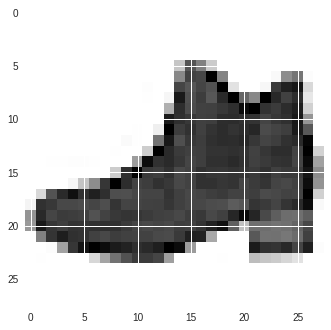

In [0]:
# Image index, you can pick any number between 0 and 59,999
img_index = 15
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]


# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

In [0]:
#Train/Test/Validation Split

# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]




In [0]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)



In [0]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)



In [0]:
# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)


# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [0]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
__________

In [0]:
#Compile the model

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Using TensorFlow backend.


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 10s 187us/step - loss: 2.4110 - acc: 0.6689 - val_loss: 0.4615 - val_acc: 0.8442

Epoch 00001: val_loss improved from inf to 0.46149, saving model to model.weights.best.hdf5
Epoch 2/10
55000/55000 [==============================] - 9s 161us/step - loss: 0.5377 - acc: 0.8013 - val_loss: 0.3817 - val_acc: 0.8662

Epoch 00002: val_loss improved from 0.46149 to 0.38169, saving model to model.weights.best.hdf5
Epoch 3/10
55000/55000 [==============================] - 9s 161us/step - loss: 0.4751 - acc: 0.8251 - val_loss: 0.3546 - val_acc: 0.8738

Epoch 00003: val_loss improved from 0.38169 to 0.35460, saving model to model.weights.best.hdf5
Epoch 4/10
55000/55000 [==============================] - 9s 159us/step - loss: 0.4370 - acc: 0.8405 - val_loss: 0.3414 - val_acc: 0.8728

Epoch 00004: val_loss improved from 0.35460 to 0.34136, saving model to model.weights.best.hdf5
Epoch 5/10
550

In [0]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [0]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8988


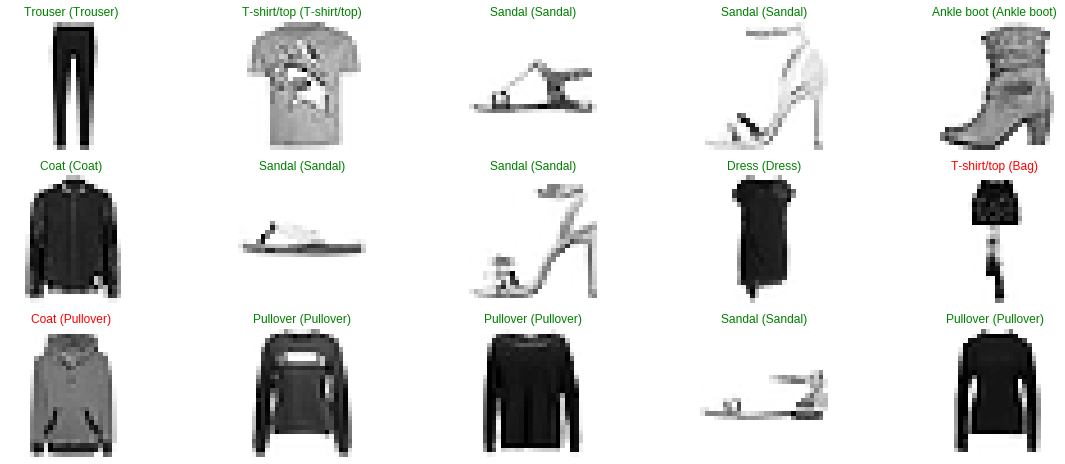

In [0]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))

for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))